In [1]:
#!/usr/bin/python

import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import HTML
import ssm
from ssm import util
import LDS
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [5]:
# enable relative imports
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import plotting_util
import tutorial_util

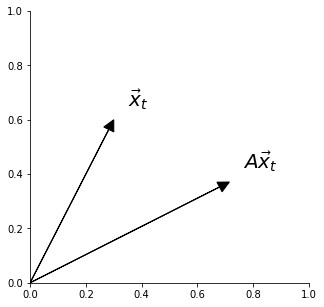

In [186]:
fig, ax = plt.subplots(1, figsize=(5,5))
x = np.array([.3,.6])
A = 1.2*util.random_rotation(x.shape[0], np.pi/5)
Ax = A.dot(x)
ax.arrow(0, 0, x[0], x[1], head_width=0.04, head_length=0.04, fc='k', ec='k', length_includes_head=True)
ax.arrow(0, 0, Ax[0], Ax[1], head_width=0.04, head_length=0.04, fc='k', ec='k', length_includes_head=True)
ax.text(x[0]+.05, x[1]+.05, "$\\vec{x}_t$", fontsize=20)
ax.text(Ax[0]+.05, Ax[1]+.05, "$A\\vec{x}_{t}$", fontsize=20)
plotting_util.remove_frame(ax)
plotting_util.savefig(fig, "linear_transform", save_path='./')

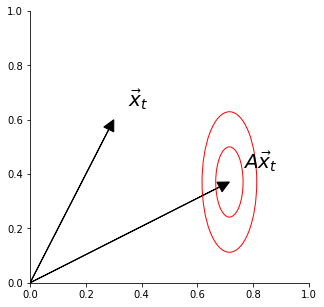

In [190]:
np.random.seed(7)
fig, ax = plt.subplots(1, figsize=(5,5))
x = np.array([.3,.6])
A = 1.2*util.random_rotation(x.shape[0], np.pi/5)
Ax = A.dot(x)
ax.arrow(0, 0, x[0], x[1], head_width=0.04, head_length=0.04, fc='k', ec='k', length_includes_head=True)
ax.arrow(0, 0, Ax[0], Ax[1], head_width=0.04, head_length=0.04, fc='k', ec='k', length_includes_head=True)
ax.text(x[0]+.05, x[1]+.05, "$\\vec{x}_t$", fontsize=20)
ax.text(Ax[0]+.05, Ax[1]+.05, "$A\\vec{x}_{t}$", fontsize=20)
plotting_util.remove_frame(ax)
from matplotlib.patches import Ellipse

def eigsorted(cov):
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    return vals[order], vecs[:,order]

nstd = 1


Q = np.diag(np.sort(np.random.rand(2,)))/30
# noise = np.random.multivariate_normal(np.zeros(2,), Q)
# ax.arrow(0, 0, Ax[0]+ noise[0], Ax[1]+ noise[1], head_width=0.04, head_length=0.04, fc='k', ec='k', length_includes_head=True)
# ax.text(Ax[0]-.39+ noise[0], Ax[1]+.01+ noise[1], "$A\\vec{x}_{t} + \omega$", fontsize=20)
for nstd in [1,2]:
    vals, vecs = eigsorted(Q)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    w, h = 2 * nstd * np.sqrt(vals)
    ell = Ellipse(xy=(Ax[0], Ax[1]),
                  width=w, height=h,
                  angle=theta, color='red')
    ell.set_facecolor('none')

    ax.add_artist(ell)
#     
    # ax.set_xlim([0,3])
    # ax.set_ylim([0,3])
#     plt.tight_layout()
plotting_util.savefig(fig, "linear_transform_with_contours", save_path='./')

In [144]:
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

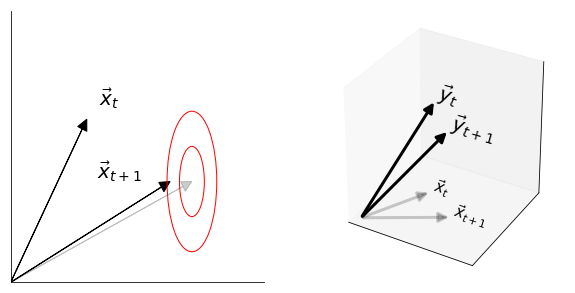

In [218]:
fig = plt.figure(figsize=(10,5))
X_ax = fig.add_subplot(121,)
Y_ax = fig.add_subplot(122, projection='3d')
X_scatter = X_ax.scatter([], [], s=100)
Y_scatter = Y_ax.scatter([], [], [],s=100,depthshade=False)
X_ax.set_xlim([0,1])
X_ax.set_ylim([0,1])
x = np.array([.3,.6])
A = 1.2*util.random_rotation(x.shape[0], np.pi/5)
Ax = A.dot(x)
X_ax.arrow(0, 0, x[0], x[1], head_width=0.04, head_length=0.04, fc='k', ec='k', length_includes_head=True)
X_ax.text(x[0]+.05, x[1]+.05, "$\\vec{x}_t$", fontsize=20)
X_ax.arrow(0, 0, Ax[0], Ax[1], head_width=0.04, head_length=0.04, fc='k', ec='k', length_includes_head=True,alpha=.2)

nstd = 1

X_ax.arrow(0, 0, Ax[0]+ noise[0], Ax[1]+ noise[1], head_width=0.04, head_length=0.04, fc='k', ec='k', length_includes_head=True)
X_ax.text(Ax[0]-.29+ noise[0], Ax[1]+.01+ noise[1], "$\\vec{x}_{t+1}$", fontsize=20)
for nstd in [1,2]:
    vals, vecs = eigsorted(Q)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    w, h = 2 * nstd * np.sqrt(vals)
    ell = Ellipse(xy=(Ax[0], Ax[1]),
                  width=w, height=h,
                  angle=theta, color='red')
    ell.set_facecolor('none')

    X_ax.add_artist(ell)
    
    
x3 = Arrow3D([0, Ax[0]+ noise[0]], [0, Ax[1]+ noise[1]], 
            [0, 0], mutation_scale=20, 
            lw=3, arrowstyle="-|>", color="black", alpha=.2)
Ax3 = Arrow3D([0, x[0]], [0, x[1]], 
            [0, 0], mutation_scale=20, 
            lw=3, arrowstyle="-|>", color="black", alpha=.2)

C = np.array([[0.84795202, 0.31441677],
       [0.04046908, 0.70750206],
       [0.47412323, 1.16003326]])
y = C.dot(x)
Ay = C.dot(Ax + noise)

y3 = Arrow3D([0, y[0]], [0, y[1]], 
            [0, y[2]], mutation_scale=20, 
            lw=3, arrowstyle="-|>", color="black")
Ay3 = Arrow3D([0, Ay[0]], [0, Ay[1]], 
            [0, Ay[2]], mutation_scale=20, 
            lw=3, arrowstyle="-|>", color="black")


Y_ax.add_artist(x3)
Y_ax.add_artist(Ax3)
Y_ax.add_artist(y3)
Y_ax.add_artist(Ay3)
Y_ax.text(y[0], y[1], y[2], '$\\vec{y}_t$', 'x', fontsize=20)
Y_ax.text(Ay[0], Ay[1], Ay[2], '$\\vec{y}_{t+1}$', 'x', fontsize=20)

Y_ax.text(x[0], x[1], 0, '$\\vec{x}_t$', 'x', fontsize=15)
Y_ax.text(Ax[0]+noise[0], Ax[1]+noise[1], 0, '$\\vec{x}_{t+1}$', 'x', fontsize=15)


Y_ax.grid(False)

# Hide axes ticks
Y_ax.set_xticks([])
Y_ax.set_yticks([])
Y_ax.set_zticks([])
X_ax.set_xticks([])
X_ax.set_yticks([])
plotting_util.remove_frame(X_ax)
plotting_util.savefig(fig, "linear_transform_with_observations", save_path='./')